# 데이터 불러오기

In [1]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 34.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=f609e57445afa06451cb97522bf3d997bcffe98be1ad5c94f4f1068fdb4ad207
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline 

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
target = pd.read_excel('/content/drive/MyDrive/월간공모전 /0619/target.xlsx')
feature = pd.read_csv('/content/drive/MyDrive/월간공모전 /0619/features_2.csv')

In [6]:
print(target.shape)
print(feature.shape)

(264, 7)
(264, 10)


In [7]:
print(target.dtypes)
print(feature.dtypes)

기간           datetime64[ns]
한국 수출금액               int64
한국의대중국수출              int64
한국의대미국수출              int64
한국의대베트남수출             int64
한국의대홍콩수출              int64
한국의대일본수출              int64
dtype: object
변환             object
경상수지          float64
자본수지          float64
산업생산지수        float64
수출물가지수        float64
생산자물가지수       float64
수출물량지수        float64
수출금액지수        float64
KOSPI         float64
Unnamed: 9    float64
dtype: object


In [8]:
feature['변환'] = pd.to_datetime(feature['변환'])

In [9]:
feature

# 2000.01 ~ 2021.12 (264)

,변환,경상수지,자본수지,산업생산지수,수출물가지수,생산자물가지수,수출물량지수,수출금액지수,KOSPI,Unnamed: 9
0,2000-01-01,-218.1,-7.9,47.7,133.65,78.77,22.87,29.30,943.88,NaN
1,2000-02-01,-324.1,0.9,47.8,130.63,78.57,22.14,29.26,828.38,NaN
2,2000-03-01,275.3,1.0,48.4,129.60,78.52,25.97,33.59,860.94,NaN
3,2000-04-01,-1156.0,0.6,48.1,129.07,78.14,24.57,31.54,725.39,NaN
4,2000-05-01,1535.5,0.0,49.9,128.96,77.95,26.87,34.37,731.88,NaN
...,...,...,...,...,...,...,...,...,...,...
259,2021-08-01,7440.0,-18.4,115.7,110.14,110.86,116.46,127.68,3199.27,NaN
260,2021-09-01,10506.1,-9.8,112.8,110.61,111.27,122.37,134.93,3068.82,NaN
261,2021-10-01,8010.4,-4.8,113.2,111.79,112.43,120.48,134.03,2970.68,NaN
262,2021-11-01,6820.7,-40.9,115.0,110.74,113.23,126.27,140.46,2839.01,NaN


In [10]:
target

,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709
...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


# 전처리 

In [11]:
feature=feature.drop('Unnamed: 9',axis=1)

In [12]:
#컬럼명 바꾸기 
target.columns = ['period', 'TotalExport', 'ChinaExport', 'USAExport', 'VietExport', 'HKExport', 'JapanExport']
target

,period,TotalExport,ChinaExport,USAExport,VietExport,HKExport,JapanExport
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709
...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


In [13]:
# 시계열 데이터로 바꾸기 
target['period'] = pd.to_datetime(target['period'])

target = target.drop(labels=range(0, 12), axis=0)
target.reset_index(inplace=True, drop=True)
target

# 2001.01 ~ 2021.12 (252)

,period,TotalExport,ChinaExport,USAExport,VietExport,HKExport,JapanExport
0,2001-01-01,12644929017,1239083390,2703366934,94830841,702872420,1616072581
1,2001-02-01,13354073762,1513732501,2502468673,135284913,802615931,1546804634
2,2001-03-01,14124891326,1607051165,2855151093,159595798,852738239,1637434941
3,2001-04-01,12121109771,1540004834,2427541727,158361600,858202241,1365516173
4,2001-05-01,13306959164,1600296077,2511513054,163293890,936811601,1479760006
...,...,...,...,...,...,...,...
247,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
248,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
249,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
250,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


In [14]:
target_total = target[['period','TotalExport']]
target_total

# 총 수출액만 타겟으로 설정

,period,TotalExport
0,2001-01-01,12644929017
1,2001-02-01,13354073762
2,2001-03-01,14124891326
3,2001-04-01,12121109771
4,2001-05-01,13306959164
...,...,...
247,2021-08-01,53165103786
248,2021-09-01,55913862375
249,2021-10-01,55660372637
250,2021-11-01,60330542263


In [63]:
target_total.set_index('period')

,TotalExport
period,
2001-01-01,12644929017
2001-02-01,13354073762
2001-03-01,14124891326
2001-04-01,12121109771
2001-05-01,13306959164
...,...
2021-08-01,53165103786
2021-09-01,55913862375
2021-10-01,55660372637


In [15]:
# [future] = 2021년 데이터지만 2022년 피처로 사용

future = feature.iloc[-12:-6]
future.reset_index(inplace=True, drop=True)
future

# 2021 -> 2022년으로 변환하기 (할 것)

# 모델 완성하고 마지막으로 넣을 데이터

,변환,경상수지,자본수지,산업생산지수,수출물가지수,생산자물가지수,수출물량지수,수출금액지수,KOSPI
0,2021-01-01,6780.9,-12.4,111.8,97.77,105.05,114.12,110.29,2976.21
1,2021-02-01,8057.5,-16.1,115.4,99.93,105.91,108.79,107.26,3012.95
2,2021-03-01,7499.4,-5.0,114.8,101.77,107.04,126.18,126.75,3061.42
3,2021-04-01,181.2,-15.7,112.9,105.53,108.06,118.61,123.47,3147.86
4,2021-05-01,10406.3,-7.6,112.7,107.11,108.65,115.74,122.45,3203.92
5,2021-06-01,8830.5,4.8,114.3,108.31,109.22,121.07,130.49,3296.68


In [16]:
feature.iloc[:, 1:] = feature.iloc[:, 1:].shift(12)  # 2000~2020년 피처 데이터 -> 2001~2021년 피처 데이터 변환 (lag)
feature = feature.drop(labels=range(0, 12), axis=0)  # 2000년 피처 데이터 삭제
feature.reset_index(inplace=True, drop=True)  # 인덱스 초기화
feature
# 연월데이터 2001~2021
# 데이터내용 2000~2020

,변환,경상수지,자본수지,산업생산지수,수출물가지수,생산자물가지수,수출물량지수,수출금액지수,KOSPI
0,2001-01-01,-218.1,-7.9,47.7,133.65,78.77,22.87,29.30,943.88
1,2001-02-01,-324.1,0.9,47.8,130.63,78.57,22.14,29.26,828.38
2,2001-03-01,275.3,1.0,48.4,129.60,78.52,25.97,33.59,860.94
3,2001-04-01,-1156.0,0.6,48.1,129.07,78.14,24.57,31.54,725.39
4,2001-05-01,1535.5,0.0,49.9,128.96,77.95,26.87,34.37,731.88
...,...,...,...,...,...,...,...,...,...
247,2021-08-01,6589.0,0.5,106.3,90.54,103.22,104.81,94.52,2326.17
248,2021-09-01,10672.3,-4.6,109.6,91.13,103.42,125.37,113.80,2327.89
249,2021-10-01,12057.1,-17.4,109.0,91.61,103.01,117.09,106.95,2267.15
250,2021-11-01,9618.8,-91.4,109.4,93.46,103.09,119.50,110.69,2591.34


In [17]:
feature_drop_datetime = feature.loc[:,'경상수지':'KOSPI']
feature_drop_datetime

,경상수지,자본수지,산업생산지수,수출물가지수,생산자물가지수,수출물량지수,수출금액지수,KOSPI
0,-218.1,-7.9,47.7,133.65,78.77,22.87,29.30,943.88
1,-324.1,0.9,47.8,130.63,78.57,22.14,29.26,828.38
2,275.3,1.0,48.4,129.60,78.52,25.97,33.59,860.94
3,-1156.0,0.6,48.1,129.07,78.14,24.57,31.54,725.39
4,1535.5,0.0,49.9,128.96,77.95,26.87,34.37,731.88
...,...,...,...,...,...,...,...,...
247,6589.0,0.5,106.3,90.54,103.22,104.81,94.52,2326.17
248,10672.3,-4.6,109.6,91.13,103.42,125.37,113.80,2327.89
249,12057.1,-17.4,109.0,91.61,103.01,117.09,106.95,2267.15
250,9618.8,-91.4,109.4,93.46,103.09,119.50,110.69,2591.34


#모델링 

In [18]:
#스케일링 
#RobustScaler 

from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler()

feature_scaled  = robustScaler.fit_transform(feature_drop_datetime)

column_names = ['경상수지', '자본수지', '산업생산지수', '수출물가지수', '생산자물가지수', '수출물량지수', '수출금액지수','KOSPI']
feature_scaled = pd.DataFrame(feature_scaled , columns=column_names)
feature_scaled['변환'] = feature['변환']

feature_scaled

,경상수지,자본수지,산업생산지수,수출물가지수,생산자물가지수,수출물량지수,수출금액지수,KOSPI,변환
0,-0.521211,-0.855172,-1.238225,1.123989,-1.098078,-0.925127,-1.084525,-0.854266,2001-01-01
1,-0.538805,0.358621,-1.235495,0.946316,-1.109466,-0.938274,-1.085292,-0.963185,2001-02-01
2,-0.439315,0.372414,-1.219113,0.885718,-1.112313,-0.869299,-1.002207,-0.932480,2001-03-01
3,-0.676886,0.317241,-1.227304,0.854537,-1.133950,-0.894512,-1.041543,-1.060306,2001-04-01
4,-0.230143,0.234483,-1.178157,0.848066,-1.144769,-0.853091,-0.987240,-1.054186,2001-05-01
...,...,...,...,...,...,...,...,...,...
247,0.608650,0.303448,0.361775,-1.412267,0.294093,0.550538,0.166939,0.449259,2021-08-01
248,1.286407,-0.400000,0.451877,-1.377556,0.305480,0.920805,0.536890,0.450881,2021-09-01
249,1.516260,-2.165517,0.435495,-1.349316,0.282135,0.771690,0.405449,0.393602,2021-10-01
250,1.111545,-12.372414,0.446416,-1.240477,0.286690,0.815092,0.477214,0.699319,2021-11-01


In [64]:
#데이터셋 분리 

X_train = feature_scaled.loc[feature_scaled['변환'] < '2020-01-01']
y_train = target_total.loc[target_total['period'] < '2020-01-01']
X_test= feature_scaled.loc[feature_scaled['변환'] >= '2020-01-01']
y_test = target_total.loc[target_total['period'] >= '2020-01-01']

In [20]:
# 날짜 데이터 삭제

X_train = X_train.drop('변환', axis=1)
y_train = y_train.drop('period', axis=1)
X_test  = X_test.drop('변환', axis=1)
y_test  = y_test.drop('period', axis=1)

In [21]:
print(X_train.shape,  y_train.shape) # 2001~2019
print('---------------')
print(X_test.shape, y_test.shape) # 2020~2021

(228, 8) (228, 1)
---------------
(24, 8) (24, 1)


###XGB boost

In [22]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

In [23]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

xgb_model = XGBRegressor(random_state=42)

grid_obj_xgb = RandomizedSearchCV(
    xgb_model, 
    parameters, 
    cv=5,
    n_iter=5, 
    scoring='neg_root_mean_squared_error',
    verbose=5,
    n_jobs=12
    )

grid_obj_xgb.fit(X_train, y_train, verbose = 1)

y_pred_train = grid_obj_xgb.predict(X_train)
y_pred_test = grid_obj_xgb.predict(X_test)

err_xgb_train = mean_squared_error(y_train, y_pred_train, multioutput='raw_values')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [24]:
# best parameter

grid_obj_xgb.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'gamma': 2,
 'learning_rate': 0.1,
 'max_depth': 15,
 'min_child_weight': 15,
 'n_estimators': 600,
 'objective': 'reg:squarederror',
 'reg_alpha': 0.5,
 'reg_lambda': 2}

In [25]:
rmse =  (err_xgb_train)**0.5
rmse

array([99517084.94398956])

In [26]:
y_test.reset_index(inplace=True, drop=True)
column_name = ['PredExport']
pred = pd.DataFrame(y_pred_test, columns=column_name)
results = pd.concat([y_test, pred], axis=1)
results

# TotalExport = 2020~2021 실제 수출액
# pred        = 2019~2020 예측 수출액

,TotalExport,PredExport
0,43103060857,4.779461e+10
1,40911818805,4.294851e+10
2,46167203855,4.705357e+10
3,36270182837,4.745298e+10
4,34854511400,4.618613e+10
5,39214070630,4.497874e+10
6,42785144050,4.704747e+10
7,39469230580,4.702318e+10
8,47819947522,4.560019e+10
9,44818534427,4.489249e+10


##### 피처 중요도

In [27]:
import eli5
from eli5.sklearn import PermutationImportance

In [28]:
permuter = PermutationImportance(
    grid_obj_xgb,
    scoring='neg_root_mean_squared_error', 
    n_iter=5,
    random_state=2
)

In [29]:
permuter.fit(X_test, y_test);

In [30]:
feature_names = X_train.columns.tolist()
feature_names

['경상수지', '자본수지', '산업생산지수', '수출물가지수', '생산자물가지수', '수출물량지수', '수출금액지수', 'KOSPI']

In [31]:
eli5.show_weights(
    permuter, 
    top=None,
    feature_names=feature_names
)

Weight,Feature
223128999.1981 ± 435372646.9392,KOSPI
128611846.3366 ± 317449489.3510,생산자물가지수
33481049.3383 ± 73463068.7070,수출물량지수
-4803937.5359 ± 4272927.8858,수출물가지수
-19640087.9245 ± 68022848.0587,자본수지
-44846277.2223 ± 118415653.3172,수출금액지수
-95899287.5216 ± 203055852.5169,산업생산지수
-135174970.3471 ± 204468602.1850,경상수지


###ARIMA

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [33]:
y_train

,TotalExport
0,12644929017
1,13354073762
2,14124891326
3,12121109771
4,13306959164
...,...
223,44020065156
224,44629052707
225,46648756033
226,44040721772


In [34]:
adfuller(y_train.TotalExport) #두번째가 p value 임. 귀무가설 기각 불가! (0.05 가 기준)

(-2.0973563783909284,
 0.2455789429474619,
 13,
 214,
 {'1%': -3.4612821203214907,
  '10%': -2.574020122281422,
  '5%': -2.875142613826617},
 9771.71788426177)

In [35]:
adfuller(y_train.TotalExport.diff().dropna()) #한번 차분하고 결측치 제거  #p-value 가 0에 가까운 값이 남 -> 1차 차분이 안정적이다! 

(-3.438755557977927,
 0.00970654690933614,
 12,
 214,
 {'1%': -3.4612821203214907,
  '10%': -2.574020122281422,
  '5%': -2.875142613826617},
 9728.750708819238)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


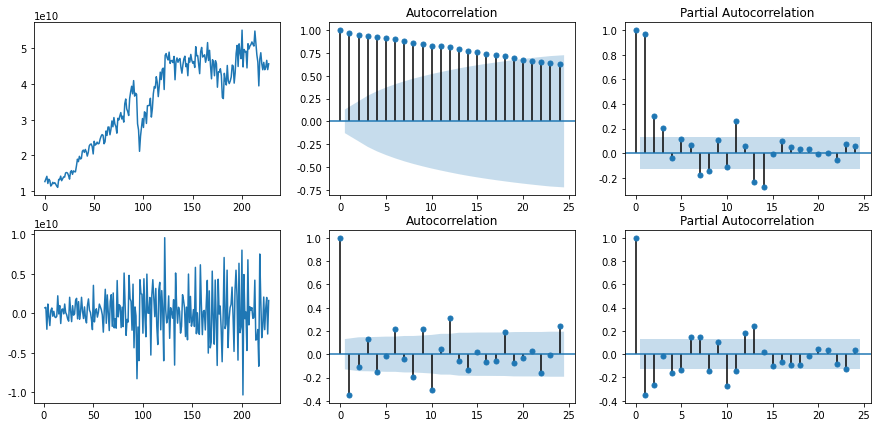

In [36]:
# 2*3 subplot

figure, axes = plt.subplots(2,3, figsize=(15,7))
axes[0,0].plot(y_train.TotalExport)
axes[1,0].plot(y_train.TotalExport.diff())
plot_acf(y_train.TotalExport, axes[0,1])
plot_pacf(y_train.TotalExport, axes[0,2])
plot_acf(y_train.TotalExport.diff().dropna(), axes[1,1])
plot_pacf(y_train.TotalExport.diff().dropna(), axes[1,2])
plt.show()

In [37]:
#ARIMA 의 차수는 (2,1,2)

model = ARIMA(y_train.TotalExport, order=(2,1,2))
model_fit = model.fit(trend = 'nc') #not constant
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.TotalExport   No. Observations:                  227
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5245.604
Method:                       css-mle   S.D. of innovations     2625385789.583
Date:                Fri, 01 Jul 2022   AIC                          10501.208
Time:                        15:18:51   BIC                          10518.333
Sample:                             1   HQIC                         10508.118
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ar.L1.D.TotalExport    -0.8568      0.142     -6.025      0.000      -1.136      -0.578
ar.L2.D.TotalExport    -0.0124      0.136     -0.091      0.928      -0.279       0.254
ma.L1.D.TotalExp

In [38]:
from itertools import product

In [39]:
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(product(p,d,q))  #조합 만들기
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [40]:
#최적의 파라미터 찾기
# AIC score 는 낮을수록 좋음. (2,1,2)
aic =[]
for i in pdq:
  model = ARIMA(y_train.TotalExport, order=(i))
  model_fit = model.fit()
  print(f'ARIMA:{i} >> AIC : {round(model_fit.aic,2)}')
  aic.append(round(model_fit.aic,2))


ARIMA:(0, 1, 0) >> AIC : 10543.75
ARIMA:(0, 1, 1) >> AIC : 10499.93
ARIMA:(0, 1, 2) >> AIC : 10500.75
ARIMA:(1, 1, 0) >> AIC : 10516.26
ARIMA:(1, 1, 1) >> AIC : 10501.0
ARIMA:(1, 1, 2) >> AIC : 10498.43
ARIMA:(2, 1, 0) >> AIC : 10501.67
ARIMA:(2, 1, 1) >> AIC : 10502.28
ARIMA:(2, 1, 2) >> AIC : 10500.43


In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

prediction = model_fit.forecast(len(y_test))  #테스트 데이터만큼 예측해줘
predicted_val = prediction[0]
predicted_ub = prediction[2][:,0]
predicted_Ib = prediction[2][:,1]
predicted_index = list(y_test.index)

r2 = r2_score(y_test, predicted_val)
rmse = sqrt(mean_squared_error(y_test, predicted_val))

In [42]:
print(rmse)
print(r2)

6330164824.955271
0.20868929111233014


##SARIMAX

In [ ]:
#총 7개의 파라미터가 존재한다. trend에 대한 부분(p,d,q)과 seasonal에 대한 부분(P,D,Q,m)으로 나뉜다.
#p : pacf에서 수렴하기 직전값. ( =2 )
#d : adf테스트 및 추세의 가시적 확인으로 추세여부 확인( =1 )
#q : acf에서 수렴하기 직전값 ( =1 )
#P : pacf에서 계절성이 주기가 몇 번 반복 됐는지 확인 ( =3 )
#D : 계절성이 있는지 확인하고 계절성 차분의 필요성에 따라 1 or 0 ( =1 )
#Q : acf기준 계절성 주기가 몇 번 반복 됐는지 확인 ( =3 )
#m : 계절성 주기 ( =24 )

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
import itertools

p = d = q = range(0,3)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [57]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None

for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      tmp_mdl = SARIMAX(y_train,
                                          exog = None,
                                          order = param,
                                          seasonal_order = param_seasonal,
                                          enforce_stationarity = True,
                                          enforce_invertibility = True)
      res = tmp_mdl.fit()
      print("SARIMAX{}x{}12 - AIC:{}".format(param,param_seasonal,res.aic))
      if res.aic < best_aic:
        best_aic = res.aic
        best_pdq = param
        best_seasonal_pdq = param_seasonal
        best_mdl = tmp_mdl

    except:
      continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq,best_seasonal_pdq,best_aic))

SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:10267.541920365911
SARIMAX(0, 0, 0)x(1, 1, 2, 12)12 - AIC:10281.75071052068
SARIMAX(0, 0, 0)x(2, 1, 1, 12)12 - AIC:10276.443094434624
SARIMAX(0, 0, 0)x(2, 1, 2, 12)12 - AIC:10256.09131199005
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:10202.498619161403
SARIMAX(0, 0, 1)x(1, 1, 2, 12)12 - AIC:10185.868715008677
SARIMAX(0, 0, 1)x(2, 1, 1, 12)12 - AIC:10201.153279468888
SARIMAX(0, 0, 1)x(2, 1, 2, 12)12 - AIC:10193.733703656817
SARIMAX(0, 0, 2)x(1, 1, 1, 12)12 - AIC:10158.032369308117
SARIMAX(0, 0, 2)x(1, 1, 2, 12)12 - AIC:10148.389022909361
SARIMAX(0, 0, 2)x(2, 1, 1, 12)12 - AIC:10158.285925798507
SARIMAX(0, 0, 2)x(2, 1, 2, 12)12 - AIC:10156.023085207044
SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:9967.9243850969
SARIMAX(0, 1, 0)x(1, 1, 2, 12)12 - AIC:9976.460724024691
SARIMAX(0, 1, 0)x(2, 1, 1, 12)12 - AIC:9962.78916447003
SARIMAX(0, 1, 0)x(2, 1, 2, 12)12 - AIC:9973.627863859954
SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:9927.826627244445
SARIMAX(0, 1, 1)x(1, 1, 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 2, 1)x(1, 1, 1, 12)12 - AIC:9968.506295576823
SARIMAX(0, 2, 1)x(1, 1, 2, 12)12 - AIC:9969.334116046492
SARIMAX(0, 2, 1)x(2, 1, 1, 12)12 - AIC:9969.339397516711
SARIMAX(0, 2, 1)x(2, 1, 2, 12)12 - AIC:9971.241143118976
SARIMAX(0, 2, 2)x(1, 1, 1, 12)12 - AIC:9905.579161856289
SARIMAX(0, 2, 2)x(1, 1, 2, 12)12 - AIC:9905.947882315562
SARIMAX(0, 2, 2)x(2, 1, 1, 12)12 - AIC:9905.255597661413
SARIMAX(0, 2, 2)x(2, 1, 2, 12)12 - AIC:9906.849959857935
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:10024.974099621944
SARIMAX(1, 0, 0)x(1, 1, 2, 12)12 - AIC:10023.391005772277
SARIMAX(1, 0, 0)x(2, 1, 1, 12)12 - AIC:10025.376112730211
SARIMAX(1, 0, 0)x(2, 1, 2, 12)12 - AIC:10027.201222771393
SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:9982.50221591112
SARIMAX(1, 0, 1)x(1, 1, 2, 12)12 - AIC:9984.067176906026
SARIMAX(1, 0, 1)x(2, 1, 1, 12)12 - AIC:9981.822061752828
SARIMAX(1, 0, 1)x(2, 1, 2, 12)12 - AIC:9983.262121545184
SARIMAX(1, 0, 2)x(1, 1, 1, 12)12 - AIC:9979.639442506941
SARIMAX(1, 0, 2)x(1, 1, 2, 1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX(2, 1, 2)x(1, 1, 2, 12)12 - AIC:9922.820280225082
SARIMAX(2, 1, 2)x(2, 1, 1, 12)12 - AIC:9924.034019614046
SARIMAX(2, 1, 2)x(2, 1, 2, 12)12 - AIC:9924.999670205474
SARIMAX(2, 2, 0)x(1, 1, 1, 12)12 - AIC:9950.719598365826
SARIMAX(2, 2, 0)x(1, 1, 2, 12)12 - AIC:9950.371031779669
SARIMAX(2, 2, 0)x(2, 1, 1, 12)12 - AIC:9950.273869716495
SARIMAX(2, 2, 0)x(2, 1, 2, 12)12 - AIC:9950.656221746074
SARIMAX(2, 2, 1)x(1, 1, 1, 12)12 - AIC:9899.285500595957
SARIMAX(2, 2, 1)x(1, 1, 2, 12)12 - AIC:9899.328471668403
SARIMAX(2, 2, 1)x(2, 1, 1, 12)12 - AIC:9898.76508831907
SARIMAX(2, 2, 1)x(2, 1, 2, 12)12 - AIC:9900.092872357149
SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 - AIC:9887.72626392769
SARIMAX(2, 2, 2)x(1, 1, 2, 12)12 - AIC:9887.64877624685
SARIMAX(2, 2, 2)x(2, 1, 1, 12)12 - AIC:9886.945615674209
SARIMAX(2, 2, 2)x(2, 1, 2, 12)12 - AIC:9888.653516890236
Best SARIMAX(2, 2, 2)x(2, 1, 1, 12)12 model - AIC:9886.945615674209


In [68]:
y_train=y_train.set_index('period')
y_train

KeyError: ignored

In [72]:
mdl = SARIMAX(endog = y_train, order = (2,2,2),
              seasonal_order= (2,1,1,12),
              enforce_stationarity=True,
              enforce_invertibility=True)

res = mdl.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [80]:
pred = res.predict(len(y_train), len(y_train))

In [84]:
pred 

2020-01-01    4.032993e+10
Freq: MS, dtype: float64

In [59]:
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        TotalExport   No. Observations:                  228
Model:             SARIMAX(2, 2, 2)x(2, 1, 1, 12)   Log Likelihood               -4935.473
Date:                            Fri, 01 Jul 2022   AIC                           9886.946
Time:                                    15:55:54   BIC                           9913.873
Sample:                                         0   HQIC                          9897.827
                                            - 228                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4396      0.115    -12.479      0.000      -1.666      -1.214
ar.L2         -0.5288      0.085     -6.207      0.000      -0.696      -0.362
ma.L1         -0.0438      0.117     -0.374      0.708      -0.274       0.186
ma.L2         -0.9340      0.120     -7.788      0.000      -1.169      -0.699
ar.S.L12      -0.0363      0.193     -0.188      0.851      -0.415       0.343
ar.S.L24      -0.1838      0.150     -1.229      0.219      -0.477       0.109
ma.S.L12      -0.6420      0.172     -3.736      0.000      -0.979      -0.305
sigma2      9.461e+18        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                       46.52   Jarque-Bera (JB):                31.99
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               3.24   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.92e+54. Standard errors may be unstable.
"""

In [69]:
y_train

,TotalExport
period,
2001-01-01,12644929017
2001-02-01,13354073762
2001-03-01,14124891326
2001-04-01,12121109771
2001-05-01,13306959164
...,...
2019-08-01,44020065156
2019-09-01,44629052707
2019-10-01,46648756033


In [73]:
sarimax_pred = res.get_prediction(start =pd.to_datetime('2019-07-01'), end=pd.to_datetime('2019-12-01'),dynamic = True) #dynamic=예측값이 실제값이라는 파라미터

In [76]:
print(sarimax_pred)

In [94]:
pred_tr_ts_sarimax = res.predict()
pred = pd.DataFrame(pred_tr_ts_sarimax)

In [96]:
pred.columns=['pred']

In [98]:
def rmse_(real, pred):
    diff = real-pred
    diff2=np.sqrt(diff**2)
    return diff2.mean()

In [99]:
rmse_(y_train,pred)

TotalExport   NaN
pred          NaN
dtype: float64

In [101]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_train, pred)**0.5
RMSE 

2691460063.3985353

# 시각화 

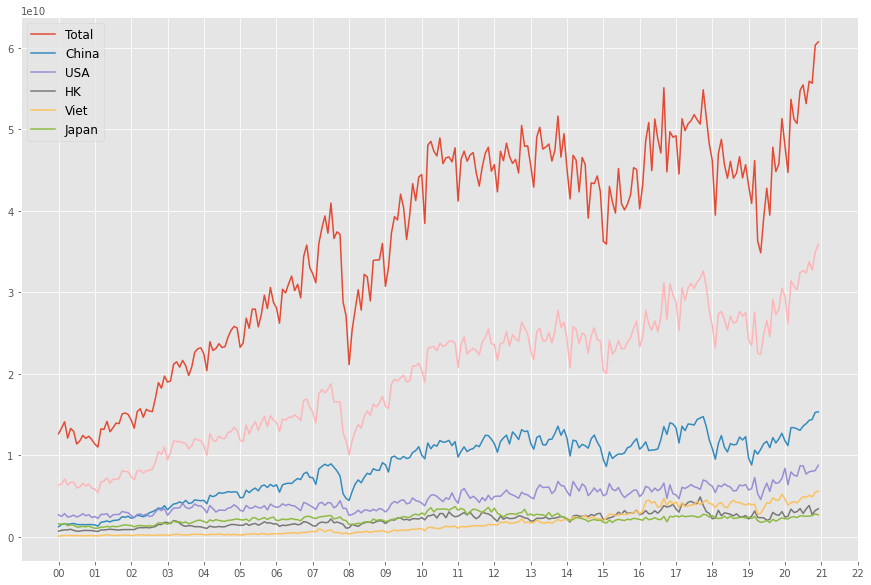

In [43]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

ax.plot(target['TotalExport'], label='Total')
ax.plot(target['ChinaExport'], label='China')
ax.plot(target['USAExport'], label='USA')
ax.plot(target['HKExport'], label='HK')
ax.plot(target['VietExport'], label='Viet')
ax.plot(target['JapanExport'], label='Japan')
ax.plot(target['ChinaExport']+target['USAExport']+target['HKExport']+target['VietExport']+target['JapanExport'])

plt.xticks([0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264], 
           ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22'])

ax.legend(loc='upper left', fontsize=12)

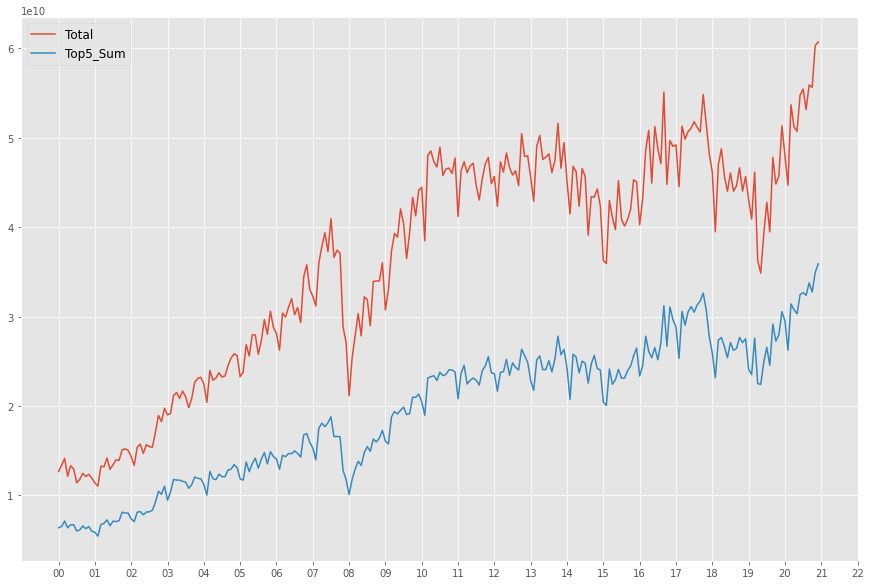

In [44]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

ax.plot(target['TotalExport'], label='Total')
ax.plot(target['ChinaExport']+target['USAExport']+target['HKExport']+target['VietExport']+target['JapanExport'], label='Top5_Sum')
plt.xticks([0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264], 
           ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22'])

ax.legend(loc='upper left', fontsize=12)

In [45]:
# 특정 열 시각화

def pp(col):
  ax.plot(col, label=col.name)
  #plt.xticks([0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264], 
           #['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22'])

  ax.legend(loc='upper left', fontsize=12)

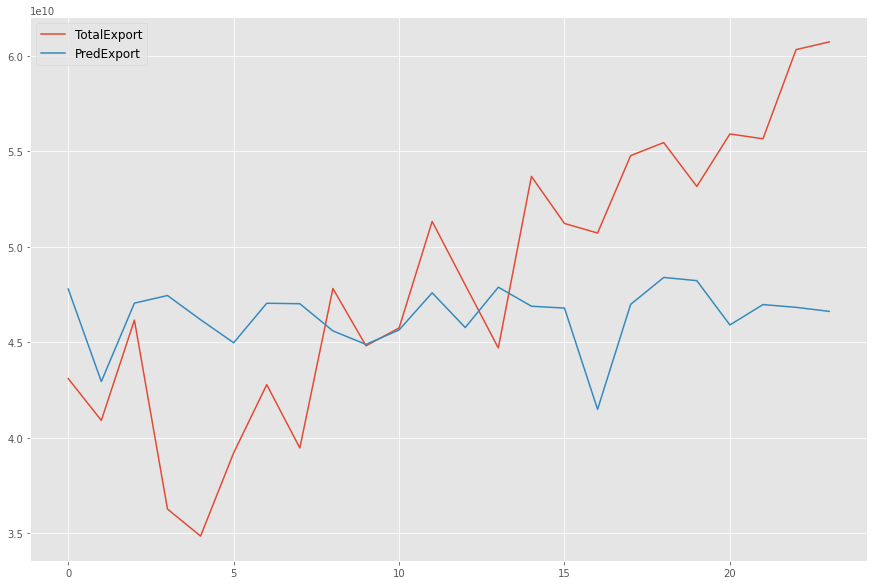

In [46]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

# 입력 
# ex) pp(df['TotalExport'])

pp(results['TotalExport']) # 2020-2021 실제 값
pp(results['PredExport']) # 2019-2020 데이터로 만든 2020~2021 예측 값